<h2>Итоговый проект по курсу "Введение в открытые данные"</h2>

<h4>Выполнила: Путилова Александра Павловна</h4>

**Цель работы:** Изучить динамику приближений астероидов и комет относительно Земли, используя официальный API NASА, а конкретно —
 SBDB Close-Approach Data API.



[Ссылка на документацию](https://ssd-api.jpl.nasa.gov/doc/cad.html)

<h3>1. Сбор данных о приближениях комет и астероидов к Земле в период с 3.12.2025 по 3.01.2026</h3>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import time

In [110]:
url="https://ssd-api.jpl.nasa.gov/cad.api?date-min=2025-12-03&date-max=2026-01-03"

response = requests.get(url)
data = response.json()
response


<Response [200]>

Формируем запрос и получем данные о сближении ОСЗ* с Землей менее чем на 0,05 а.е*(~75 млн.км.). в течение следующих 30 дней. 

**a.e – астрономическая единица =~149,6 млн.км. (Расстояние от Земли до Солнца)*
* 

**ОСЗ — объект, сближающийся с Землей*

<h4>Описание данных: </h4>


des – основное обозначение астероида или кометы (например, 443, 2000 SG344)  

orbit_id — идентификатор орбиты, используемый для вычисления близкого сближения  

jd — время близкого сближения (в юлианских сутках, эфемеридное время TDB)  

cd — время близкого сближения (форматированная календарная дата/время, TDB)  

dist — номинальное расстояние сближения (а.е.)  

dist_min — минимальное (3-сигма) расстояние сближения (а.е.)  

dist_max— максимальное (3-сигма) расстояние сближения (а.е.)  

v_rel — относительная скорость по отношению к объекту сближения на момент сближения (км/с)  

v_inf — скорость относительно безмассового тела (км/с)  

t_sigma_f — 3-сигма неопределенность во времени сближения (форматировано в днях, часах и минутах; дни не включаются если равны нулю; пример "13:02" — 13 часов 2 минуты; пример "2_09:08" — 2 дня 9 часов 8 минут)  

h — абсолютная звездная величина H (маг)  


In [145]:
sbdb_df = pd.DataFrame(data['data'], columns=data['fields'])
sbdb_df

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2025 WO9,2,2461012.544397718,2025-Dec-03 01:04,0.0233793376145398,0.0232042922226338,0.0235543667208562,6.0638211810093,6.04499733419999,< 00:01,27.238
1,2025 WC10,3,2461012.624263395,2025-Dec-03 02:59,0.0206867010204498,0.0205939176880204,0.0207794804486713,7.34434542211841,7.32678691936423,00:01,27.436
2,2025 WN1,7,2461012.695183306,2025-Dec-03 04:41,0.0284271772853957,0.0283757861531391,0.0284785638773654,2.78477450763334,2.75091058698375,00:02,24.483
3,2025 WP16,2,2461012.717311152,2025-Dec-03 05:13,0.00292037333065613,0.00291681065811166,0.00292393588293917,11.3706747936336,11.2901502520812,< 00:01,28.894
4,2014 WC364,6,2461012.982728483,2025-Dec-03 11:35,0.0263949411631941,0.0263940542934764,0.0263958280329492,12.5000750525741,12.4919967634232,< 00:01,24.8
5,2025 UF10,23,2461013.769083555,2025-Dec-04 06:27,0.0370582640794701,0.037048699182902,0.0370678289721158,13.1270076159299,13.121529235582,< 00:01,22.125
6,2025 VE6,11,2461014.257570149,2025-Dec-04 18:11,0.01615473922981,0.0161339164030626,0.0161755613949015,5.18262183140641,5.15069892018342,< 00:01,26.01
7,2025 WM3,4,2461014.820583179,2025-Dec-05 07:42,0.0360237180496103,0.0359122109380884,0.0361352242726713,10.714912864764,10.7080076825925,< 00:01,25.617
8,2025 WF10,2,2461015.902867219,2025-Dec-06 09:40,0.0468600726868948,0.0467040248349881,0.0470161143619811,4.32485705372594,4.31168967681249,00:23,24.759
9,2025 WD10,2,2461015.931290889,2025-Dec-06 10:21,0.0198336877261345,0.0197164524108917,0.0199509161697208,6.88625516593174,6.86671886851368,00:03,26.909


<h3>Для более привычного восприятия данных переведем а.е в км.</h3>

In [146]:
AU_TO_KM = 149597870.7
sbdb_df['dist'] = sbdb_df['dist'].astype(float) * AU_TO_KM
sbdb_df['dist_min'] = sbdb_df['dist'].astype(float) * AU_TO_KM
sbdb_df['dist_max'] = sbdb_df['dist'].astype(float) * AU_TO_KM

sbdb_df

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2025 WO9,2,2461012.544397718,2025-Dec-03 01:04,3.497499e+06,5.232184e+14,5.232184e+14,6.0638211810093,6.04499733419999,< 00:01,27.238
1,2025 WC10,3,2461012.624263395,2025-Dec-03 02:59,3.094686e+06,4.629585e+14,4.629585e+14,7.34434542211841,7.32678691936423,00:01,27.436
2,2025 WN1,7,2461012.695183306,2025-Dec-03 04:41,4.252645e+06,6.361867e+14,6.361867e+14,2.78477450763334,2.75091058698375,00:02,24.483
3,2025 WP16,2,2461012.717311152,2025-Dec-03 05:13,4.368816e+05,6.535656e+13,6.535656e+13,11.3706747936336,11.2901502520812,< 00:01,28.894
4,2014 WC364,6,2461012.982728483,2025-Dec-03 11:35,3.948627e+06,5.907062e+14,5.907062e+14,12.5000750525741,12.4919967634232,< 00:01,24.8
5,2025 UF10,23,2461013.769083555,2025-Dec-04 06:27,5.543837e+06,8.293463e+14,8.293463e+14,13.1270076159299,13.121529235582,< 00:01,22.125
6,2025 VE6,11,2461014.257570149,2025-Dec-04 18:11,2.416715e+06,3.615354e+14,3.615354e+14,5.18262183140641,5.15069892018342,< 00:01,26.01
7,2025 WM3,4,2461014.820583179,2025-Dec-05 07:42,5.389072e+06,8.061936e+14,8.061936e+14,10.714912864764,10.7080076825925,< 00:01,25.617
8,2025 WF10,2,2461015.902867219,2025-Dec-06 09:40,7.010167e+06,1.048706e+15,1.048706e+15,4.32485705372594,4.31168967681249,00:23,24.759
9,2025 WD10,2,2461015.931290889,2025-Dec-06 10:21,2.967077e+06,4.438685e+14,4.438685e+14,6.88625516593174,6.86671886851368,00:03,26.909


<h3>Визаулизация данных по приближениям космических тел за 30 дней</h3> 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2220\2952054798.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


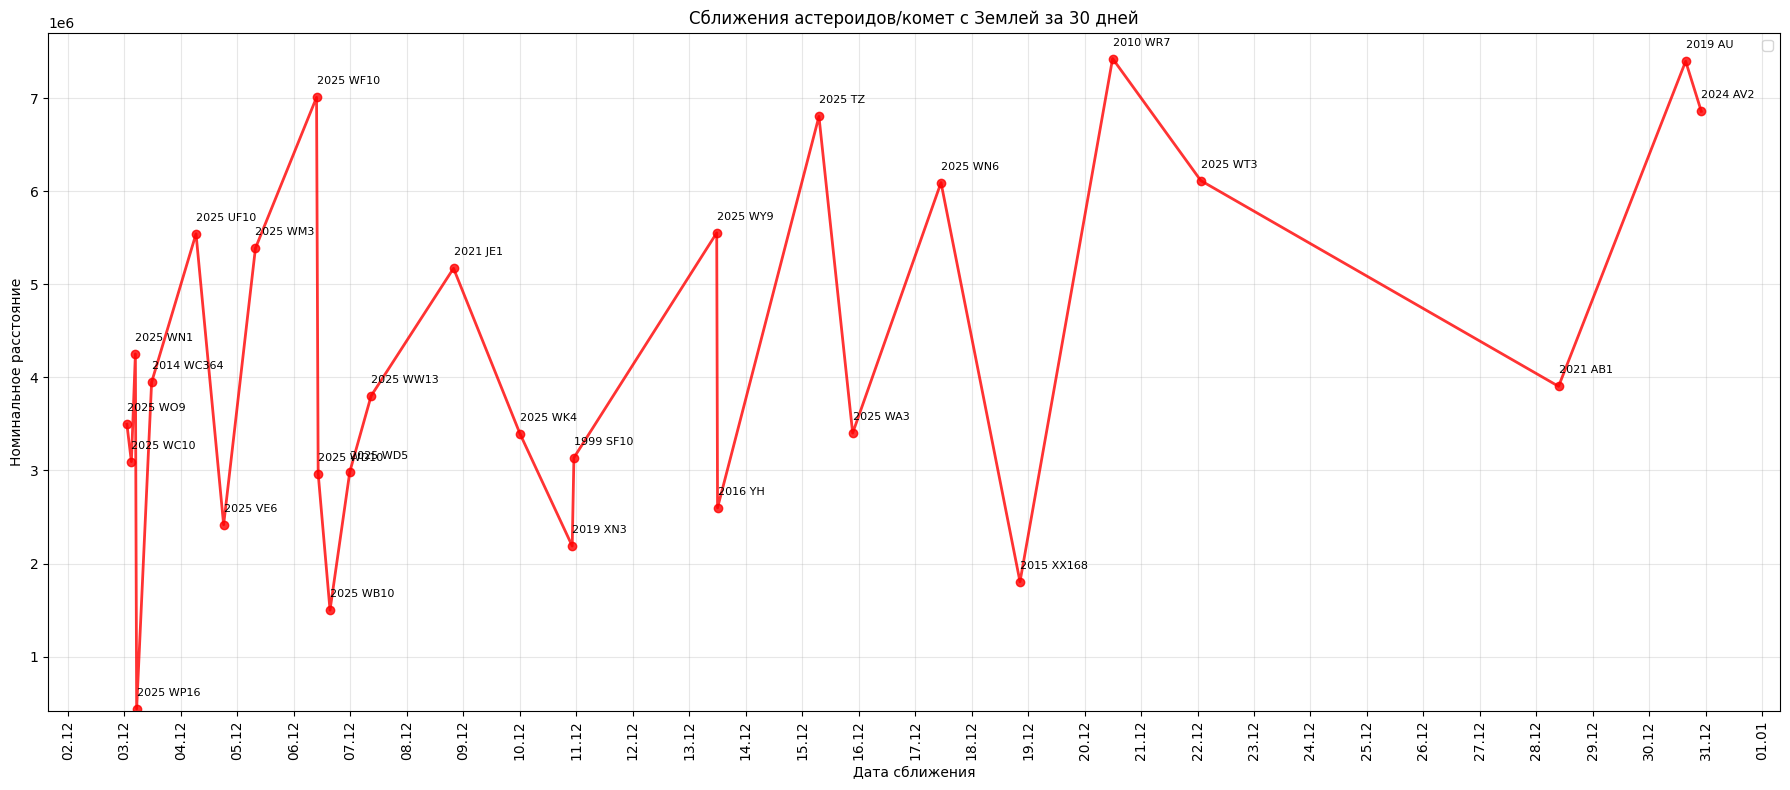

In [ ]:
import matplotlib.dates as mdates


sbdb_df['cd'] = pd.to_datetime(sbdb_df['cd'], format='%Y-%b-%d %H:%M')  

plt.figure(figsize=(18, 8))

plt.plot(
    sbdb_df['cd'],
    sbdb_df['dist'],
    'o-',
    linewidth=2,
    markersize=6,
    color='red',
    alpha=0.8,
    
)

y = sbdb_df['dist']
offset = (y.max() - y.min()) * 0.02 if len(y) > 1 else 10  
for _, row in plot_df.iterrows():
    plt.text(
        row['cd'],
        row['dist'] + offset,
        row['des'],
        fontsize=8,
        rotation=360,
        ha='left'
    )

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
plt.xticks(rotation=90)

plt.xlabel('Дата сближения')
plt.ylabel('Номинальное расстояние')
plt.title('Сближения астероидов/комет с Землей за 30 дней')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')


plt.ylim(y.min() * 0.95, y.max() + offset * 2)

plt.tight_layout()
plt.show()


Судя по графику в диапазоне с **3.12.2025 до 3.01.2025** можно выделить **5** самых близких по расстоянию к Земле объектов:  
1. 2025 WP16  
2. 2025 WB10
3. 2019 XN3
4. 2016 YH
5. 2015 XX168

Выясним конкретное номинальное расстояние этих объектов до Земли

In [115]:
WP16 = sbdb_df.loc[sbdb_df['des'] == '2025 WP16', 'dist'].iloc[0]
WB10 = sbdb_df.loc[sbdb_df['des'] == '2025 WB10', 'dist'].iloc[0]
XN3  = sbdb_df.loc[sbdb_df['des'] == '2019 XN3',  'dist'].iloc[0]
YH   = sbdb_df.loc[sbdb_df['des'] == '2016 YH',   'dist'].iloc[0]
XX168 = sbdb_df.loc[sbdb_df['des'] == '2015 XX168', 'dist'].iloc[0]

print(f'Расстояние:\n2025 WP16: {WP16}\n2025 WB10: {WB10}\n2019 XN3: {XN3}\n2016 YH: {YH}\n2015 XX168: {XX168}')


Расстояние:
2025 WP16: 436881.6319152241
2025 WB10: 1498611.3481353028
2019 XN3: 2187580.984601468
2016 YH: 2597989.097866048
2015 XX168: 1804027.8633630197


**Расстояние самого близкого к Земле астероида в представленном даиапазоне 2025 WP16 ≈ 436881 км.**

<h3> Сравним ТОП 5 самых близких объектов по общим физическим параметрам. Для этого: </h3>

1. Обратимся к SBDB (Small-Body DataBase), в которой содержатся данные обо всех известных астероидах и кометах Солнечной Системы  

2. Составим серию запросов по физическим параметрам каждого из объектов

3. Объединим полученные json файлы в один датафрейм для удобства

Серийные API запросы по каждому из объектов:

In [105]:
import requests

url="https://ssd-api.jpl.nasa.gov/sbdb.api?sstr=2025WP16&phys-par=1"

response = requests.get(url)
data3 = response.json()
response

<Response [200]>

In [116]:
url="https://ssd-api.jpl.nasa.gov/sbdb.api?sstr=2025WB10&phys-par=1"

response = requests.get(url)
data4 = response.json()
response

<Response [200]>

In [117]:
url="https://ssd-api.jpl.nasa.gov/sbdb.api?sstr=2019XN3&phys-par=1"

response = requests.get(url)
data5 = response.json()
response

<Response [200]>

In [118]:
url="https://ssd-api.jpl.nasa.gov/sbdb.api?sstr=2016YH&phys-par=1"

response = requests.get(url)
data6 = response.json()
response

<Response [200]>

In [119]:
url="https://ssd-api.jpl.nasa.gov/sbdb.api?sstr=2015XX168&phys-par=1"

response = requests.get(url)
data7 = response.json()
response

<Response [200]>

<h4>Описание данных: </h4>


name – название/символ физического параметра 

units — единицы измерения значения (если таковые имеются)

value — значение параметра

ref — ссылка (если таковые имеются)  

notes — особые указания (если таковые имеются)

desc – описание параметра  

sigma — 1-сигма-значение параметра (если таковые имеется)

title – краткое описательное название (если таковое имеется) 



Формирование отдельнных датафреймов из полученных json файлов:

In [120]:
sbdb4_df = pd.DataFrame(data4['phys_par'])
sbdb4_df.insert(0,'NEO','2025_WB10') #добавим название ОСЗ для будущего единого датафрейма
sbdb4_df.head()

,NEO,units,name,title,sigma,desc,notes,value,ref
0,2025_WB10,None,H,absolute magnitude,.27053,absolute magnitude (magnitude at 1 au from Sun...,autocmod 3.0g,27.169,3


In [121]:
sbdb3_df = pd.DataFrame(data3['phys_par'])
sbdb3_df.insert(0,'NEO','2025_WP16') 
sbdb3_df.head()


,NEO,title,value,name,notes,sigma,desc,units,ref
0,2025_WP16,absolute magnitude,28.894,H,autocmod 3.0g,.38483,absolute magnitude (magnitude at 1 au from Sun...,None,2


In [122]:
sbdb5_df = pd.DataFrame(data5['phys_par'])
sbdb5_df.insert(0,'NEO','2019 XN3') 
sbdb5_df.head()

,NEO,name,units,ref,value,notes,desc,sigma,title
0,2019 XN3,H,None,E2023-SP5,26.84,autocmod 2.8,absolute magnitude (magnitude at 1 au from Sun...,.40176,absolute magnitude


In [123]:
sbdb6_df = pd.DataFrame(data6['phys_par'])
sbdb6_df.insert(0,'NEO','2016 YH') 
sbdb6_df.head()

,NEO,title,value,notes,name,sigma,desc,units,ref
0,2016 YH,absolute magnitude,25.5,None,H,None,absolute magnitude (magnitude at 1 au from Sun...,None,MPO394957


In [124]:
sbdb7_df = pd.DataFrame(data7['phys_par'])
sbdb7_df.insert(0,'NEO','2015 XX168') 
sbdb7_df.head()

,NEO,sigma,title,value,ref,notes,desc,units,name
0,2015 XX168,None,absolute magnitude,25.6,MPO358575,None,absolute magnitude (magnitude at 1 au from Sun...,None,H


Создание единого датафрейма:

In [125]:
sbdb_phys=pd.concat([sbdb3_df, sbdb4_df, sbdb5_df, sbdb6_df, sbdb7_df], ignore_index=True)
sbdb_phys

,NEO,title,value,name,notes,sigma,desc,units,ref
0,2025_WP16,absolute magnitude,28.894,H,autocmod 3.0g,.38483,absolute magnitude (magnitude at 1 au from Sun...,None,2
1,2025_WB10,absolute magnitude,27.169,H,autocmod 3.0g,.27053,absolute magnitude (magnitude at 1 au from Sun...,None,3
2,2019 XN3,absolute magnitude,26.84,H,autocmod 2.8,.40176,absolute magnitude (magnitude at 1 au from Sun...,None,E2023-SP5
3,2016 YH,absolute magnitude,25.5,H,None,None,absolute magnitude (magnitude at 1 au from Sun...,None,MPO394957
4,2015 XX168,absolute magnitude,25.6,H,None,None,absolute magnitude (magnitude at 1 au from Sun...,None,MPO358575


In [126]:
sbdb_phys["value"] = sbdb_phys["value"].astype(float)
diff=sbdb_phys["value"].max() - sbdb_phys["value"].min()
diff

np.float64(3.3939999999999984)

Для каждого из объектов была рассчитана, как физический параметр, абсолютная звездная величина(H)*.
Так как H не имеет определенной единицы измерения, unit отображен как None. 
Также по значениям параметра H можно заметить, что ОСЗ 2025 WP16 обладает самой высокой яркостью из выборки, а 2016 YH – наоборот: разница в показателях сотавляет ≈ 3,39 единиц.  

**абсолютная звездная величина (H) — яркость объекта при расстоянии = 1 а.е от Солнца и наблюдателя*


<h3>Составим еще один API запрос по сближениям за 2025 год, чтобы выявить наличие приближений астероидов к Земле более, чем на расстояние 2025 WP16.</h3> 

Для этого обращаемся к dist_max самого первого датафрейма sbdb_df и выводим максимальное (3-сигма) расстояние сближения WP16 в а.е. 

In [129]:
WP_16 = sbdb_df.loc[sbdb_df['des'] == '2025 WP16', 'dist_max']
WP_16


3    0.00292393588293917
Name: dist_max, dtype: object

Теперь воспользуемся полученным значением для API

In [ ]:
url="https://ssd-api.jpl.nasa.gov/cad.api?date-min=2025-01-01&date-max=2025-12-31&dist-max=0.00292393588293917&body=Earth"

response = requests.get(url)
data2 = response.json()
response

<Response [200]>

И сформируем датафрейм

In [172]:

sbdb2_df = pd.DataFrame(data2['data'], columns=data2['fields'])
sbdb2_df.head()


,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2025 AC,4,2460678.441924841,2025-Jan-02 22:36,0.000937322077407543,0.000937291730812402,0.000937352423170974,4.27897837743069,3.5530767493392,< 00:01,29.02
1,2025 AB,6,2460678.765340492,2025-Jan-03 06:22,0.00102359312341815,0.00102321565027569,0.00102397058592668,11.560253192486,11.3328427175776,< 00:01,27.13
2,2025 AZ3,6,2460687.059660819,2025-Jan-11 13:26,0.00152559499305931,0.00152376090176348,0.00152742904081942,8.21681279233389,8.00143588196423,< 00:01,25.91
3,2025 BA1,1,2460690.366616664,2025-Jan-14 20:48,0.0018380692981346,0.00182255983277632,0.00185357777067774,13.4611357538986,13.3530131603548,00:42,27.59
4,2025 BP,3,2460691.363075660,2025-Jan-15 20:43,0.00287519464427516,0.00285856569318827,0.00289182246802229,17.6240704219823,17.5714095301529,00:07,27.43


<h3>Визуализация данных по 10 ОСЗ с самым близким расстоянием относительно Земли за 2025 год<h3>

Text(0.5, 1.0, 'ОСЗ с наименьшим расстоянием сближения (dist)')

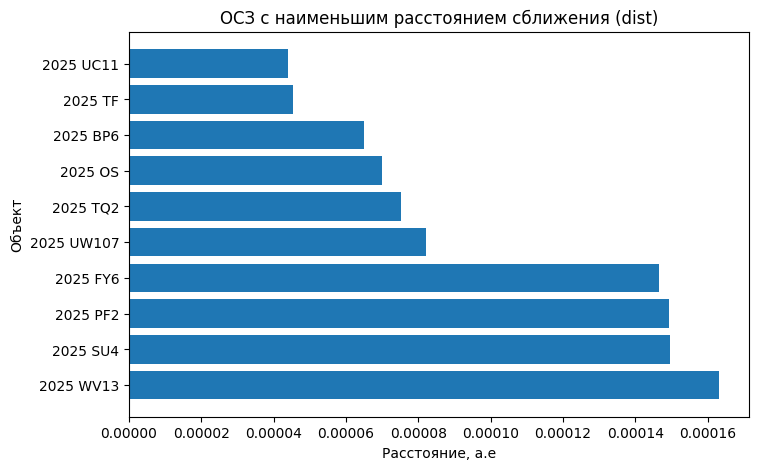

In [131]:
sbdb2_df["dist"] = pd.to_numeric(sbdb2_df["dist"], errors="coerce")
top_10=sbdb2_df.sort_values("dist").head(10)

plt.figure(figsize=(8, 5))
plt.barh(top_10["des"], top_10["dist"])  
plt.xlabel("Расстояние, a.e")
plt.gca().invert_yaxis() 
plt.ylabel("Объект")
plt.title("ОСЗ с наименьшим расстоянием сближения (dist)")

Исходя из графика, можно вывести 2 объекта в 2025 году с наиболее меньшим расстоянием к Земле относительно WP16 –  
это **2025 UC11 и 2025 ТF**

Выявим разницу в расстоянии их приближений к Земле:  
(Переведем значения расстояния с а.е в километры для лучшего восприятия)

In [139]:
AU_TO_KM = 149597870.7
sbdb2_df['dist'] = sbdb2_df['dist'].astype(float)*AU_TO_KM

TF = sbdb2_df.loc[sbdb2_df['des'] == '2025 TF', 'dist'].iloc[0]
UC11 = sbdb2_df.loc[sbdb2_df['des'] == '2025 UC11', 'dist'].iloc[0]
TF-UC11


np.float64(181.28295359460753)

Выявим расстояние у объекта с самым большим  сближением с Землей в 2025 году – 2025 UC11:

In [173]:
UC11 = sbdb2_df.loc[sbdb2_df['des'] == '2025 UC11', 'dist'].iloc[0]
UC11

'4.41128327249007e-05'

Выявим дату максимального сближения объекта:

In [142]:
UC11 = sbdb2_df.loc[sbdb2_df['des'] == '2025 UC11', 'cd'].iloc[0]
UC11

'2025-Oct-30 12:11'

Выявим разницу в расстояниях между самым близким объектом за текущие 30 дней 2025 WP16 и за весь 2025-й год 2025 UC11 

In [151]:
UC11 = sbdb2_df.loc[sbdb2_df['des'] == '2025 UC11', 'dist'].iloc[0]
WP16 = 436881.6319152241

WP16-UC11

np.float64(430282.44606903364)

Таким образом, за текущий год самым близким к Земле объектом явялется **2025 UC11** со значением расстояния ≈ 6599 км. Такое расстояние было им достигнуто 30.10.2025 года.  

Вторым по расстоянию ОСЗ является **2025 TF** с разницей с 2025 UC 11 в ≈ 181 км.  

Разница в расстоянии между самым близким к Земле космическим телом за текущие 30 дней 2025 WP15 и 2025 UC 11 составляет ≈ 430282 км. 